# <a id='toc1_'></a><font color=blue>Métodos de asociación de fenotipos y genotipos múltiples</font>
## <a id='toc1_1_'></a>Datos Papa
### <a id='toc1_1_1_'></a>*Autor: Juan Pablo Acero*
### <a id='toc1_1_2_'></a>*jupaceroba@unal.edu.co*
<a class="anchor" id="Inicio"></a>

**Table of contents**<a id='toc0_'></a>    
   
  - [Dependencias](#toc1_2_)    
    - [Instalación](#toc1_2_1_)    
    - [Importación](#toc1_2_2_)    
  - [Lectura de los datos](#toc1_3_)    
  - [Transformación de los datos](#toc1_4_)    
  - [Resumen de los datos](#toc1_5_)    
  - [Método Chi_cuadrado: reducción de dimensionalidad](#toc1_6_)    
    - [PCA para datos después de Chi_cuadrado](#toc1_6_1_)    
  - [Aplicación Metodología](#toc1_7_)    
    - [Metodología para aplicar](#toc1_7_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_2_'></a>[Dependencias](#toc0_)


### <a id='toc1_2_1_'></a>[Instalación](#toc0_)

In [3]:
source("import.R")


In [6]:
Sys.setenv(JAVA_HOME='C:\\Program Files\\Java\\jre1.8.0_311')


### <a id='toc1_2_2_'></a>[Importación](#toc0_)

In [7]:
library(tidyverse)
library(xtable)
library(corrplot)
library(factoextra)
library(FactoMineR)
library(psych) 
library(ggplot2)
library(dplyr)
library(qqman)
library(stringr)
library(tidyverse)
library(readxl)
library(plyr)
library(ggVennDiagram)
library(xlsx)
library(summarytools)


Warning message:
"package 'xlsx' was built under R version 4.2.3"

Attaching package: 'summarytools'


The following objects are masked from 'package:xtable':

    label, label<-


The following object is masked from 'package:tibble':

    view




In [36]:
source("functions.R") #Load "dim_reduc_chisq" to reduce dimensionality and "metodo"

## <a id='toc1_3_'></a>[Lectura de datos](#toc0_)

In [70]:
datospapa1=read_excel("data/44K_v6_All_Accessions_Sorted.xlsx")
datospapa<-read_excel("data/final2_data_papa_filtrados.xlsx")
fenopapa=read_excel("data/Accessiones_Papa.xlsx")

New names:
• `` -> `...1`
New names:
• `Lugar_antocianinas` -> `Lugar_antocianinas...40`
• `Color_1rio_piel_tubérculo_simple` -> `Color_1rio_piel_tubérculo_simple...43`
• `Color_2rio_piel_tubérculo_simple` -> `Color_2rio_piel_tubérculo_simple...44`
• `Color_1rio_interior_tubérculo_simple` -> `Color_1rio_interior_tubérculo_simple...45`
• `Color_2rio_interior_tubérculo_simple` -> `Color_2rio_interior_tubérculo_simple...46`
• `Lugar_antocianinas` -> `Lugar_antocianinas...48`
• `Color_1rio_piel_tubérculo_simple` -> `Color_1rio_piel_tubérculo_simple...129`
• `Color_2rio_piel_tubérculo_simple` -> `Color_2rio_piel_tubérculo_simple...130`
• `Color_1rio_interior_tubérculo_simple` -> `Color_1rio_interior_tubérculo_simple...131`
• `Color_2rio_interior_tubérculo_simple` -> `Color_2rio_interior_tubérculo_simple...132`


## <a id='toc1_4_'></a>[Transformación de datos](#toc0_)

In [10]:
datospapa1=datospapa1[,-c(1,2,3)]
nombrespapas=colnames(datospapa1)
nombrespapas=nombrespapas[-1]
datos_final_papa=datospapa[,-1]
datos_final_papa2=as.matrix(datos_final_papa)

## <a id='toc1_5_'></a>[Resumen de datos](#toc0_)


In [11]:
resumen_snps=apply(datos_final_papa2,MARGIN = 2 , table)

In [12]:
resumen_snps_t=t(resumen_snps)

In [13]:
resumen_snps_t=as.data.frame(resumen_snps_t)

In [14]:
dim(resumen_snps_t)


[1] 1228    2

In [15]:
head(resumen_snps_t)

,0,1
,<int>,<int>
ST6.chr09pos42428007,36,114
ST6.chr09pos42428010,40,110
ST6.chr09pos43997188,33,117
ST6.chr09pos43997199,38,112
ST6.chr09pos43997246,28,122
ST6.chr09pos44190338,35,115


In [16]:
resumen_snps_t$Proporcion=resumen_snps_t[,1]/(resumen_snps_t[,1]+resumen_snps_t[,2])

In [17]:
write.xlsx2(t(head(resumen_snps_t, 8)),"data/snps_papas_resumen.xlsx" )

In [18]:
t(head(resumen_snps_t, 8))

,ST6.chr09pos42428007,ST6.chr09pos42428010,ST6.chr09pos43997188,ST6.chr09pos43997199,ST6.chr09pos43997246,ST6.chr09pos44190338,ST6.chr09pos47799986,ST6.chr09pos48870897
0,36.00,40.0000000,33.00,38.0000000,28.0000000,35.0000000,31.0000000,35.0000000
1,114.00,110.0000000,117.00,112.0000000,122.0000000,115.0000000,119.0000000,115.0000000
Proporcion,0.24,0.2666667,0.22,0.2533333,0.1866667,0.2333333,0.2066667,0.2333333


## <a id='toc1_6_'></a>[Método Chi_cuadrado: reducción de dimensionalidad](#toc0_)

In [21]:
matriz_ind = dim_reduc_chisq(datos_final_papa2)

Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(datos[, i], datos[, j]):
"Chi-squared approximation may be incorrect"


In [22]:
medias_cor=colMeans(matriz_ind)
medias_cor

ST6.chr09pos42428007   ST6.chr09pos42428010   ST6.chr09pos43997188 
             0.4361768              0.3971798              0.4318053 
  ST6.chr09pos43997199   ST6.chr09pos43997246   ST6.chr09pos44190338 
             0.3980363              0.4032083              0.4334391 
  ST6.chr09pos47799986   ST6.chr09pos48870897   ST6.chr09pos48870908 
             0.3629459              0.4217107              0.4159761 
  ST6.chr09pos48870910   ST6.chr09pos48870967   ST6.chr09pos49359725 
             0.4100384              0.4234396              0.4215750 
  ST6.chr09pos50283509   ST6.chr09pos50283515   ST6.chr09pos50283529 
             0.4026468              0.3824083              0.4096199 
  ST6.chr09pos50283540   ST6.chr09pos50283548   ST6.chr09pos50283556 
             0.3887038              0.3615286              0.3937094 
  ST6.chr09pos50283593   ST6.chr09pos50283596   ST6.chr09pos50443450 
             0.3972218              0.4328572              0.4396480 
  ST6.chr09pos50443462   ST6.chr09pos50445235   ST6.chr09pos50445244 
             0.4220033              0.3851582              0.4172163 
  ST6.chr09pos50445245   ST6.chr09pos50445284   ST6.chr09pos50445286 
             0.3746158              0.4414956              0.4562509 
  ST6.chr09pos50445287   ST6.chr09pos50603791   ST6.chr09pos50787794 
             0.4128461              0.4030903              0.4288936 
  ST6.chr09pos50787807   ST6.chr09pos50787816   ST6.chr09pos51194813 
             0.4248424              0.4119739              0.3797473 
  ST6.chr09pos51342563   ST6.chr09pos51342598   ST6.chr09pos51342637 
             0.4645554              0.4165340              0.4039083 
  ST6.chr09pos51477462   ST6.chr09pos51663390   ST6.chr09pos53177240 
             0.4485657              0.4093064              0.4471795 
  ST6.chr09pos53177243   ST6.chr09pos53177301   ST6.chr09pos53755290 
             0.4467255              0.4047844              0.4313536 
  ST6.chr09pos53864240   ST6.chr09pos54229349   ST6.chr09pos54413534 
             0.3919155              0.4108777              0.4068797 
  ST6.chr09pos54413535   ST6.chr09pos54413536   ST6.chr09pos55378774 
             0.4101893              0.4117525              0.4445844 
  ST6.chr09pos55381283   ST6.chr09pos56116691   ST6.chr09pos56116715 
             0.4346834              0.4587502              0.4141811 
  ST6.chr09pos56675848   ST6.chr09pos56746643   ST6.chr09pos56807813 
             0.4555600              0.4087036              0.4297673 
  ST6.chr09pos56807848   ST6.chr09pos56807867   ST6.chr09pos56830946 
             0.4735835              0.4285460              0.3898289 
  ST6.chr09pos56830973   ST6.chr09pos56830974   ST6.chr09pos57575401 
             0.4494436              0.4352029              0.4064663 
  ST6.chr09pos57575460   ST6.chr09pos57702977   ST6.chr09pos57702982 
             0.4376017              0.4766594              0.4342379 
  ST6.chr09pos58099220   ST6.chr09pos58502930   ST6.chr09pos58502931 
             0.4008396              0.4030623              0.4558727 
  ST6.chr09pos58502989   ST6.chr09pos58503003   ST6.chr09pos58503012 
             0.4324626              0.4520796              0.4277789 
  ST6.chr09pos59147564   ST6.chr09pos59147567   ST6.chr09pos59147575 
             0.4322848              0.4228769              0.4428295 
  ST6.chr09pos59147587   ST6.chr09pos59486459   ST6.chr09pos59486502 
             0.4076038              0.3985956              0.4299506 
  ST6.chr09pos59486510   ST6.chr09pos59486534   ST6.chr09pos59486543 
             0.4653249              0.4250891              0.4081764 
  ST6.chr09pos60166401   ST6.chr09pos60665345   ST6.chr09pos60665376 
             0.4339831              0.4337302              0.3956717 
  ST6.chr09pos60919784   ST6.chr09pos60919802   ST6.chr09pos61410236 
             0.4199861              0.4207583              0.4239098 
  ST6.chr09pos61582363   ST6.chr09pos61633163   ST6.chr09pos61928313 
            

In [23]:
data.frame(quantile = quantile(medias_cor, prob=seq(0, 1, length = 101)))

,quantile
,<dbl>
0%,0.3615286
1%,0.3801392
2%,0.3849050
3%,0.3886238
4%,0.3919578
5%,0.3958242
6%,0.3978609
7%,0.4004584
8%,0.4021186


In [24]:
b=Filter(function(x) x <0.382 , medias_cor)

In [25]:
b1=names(b)
col.num <- which(colnames(datos_final_papa) %in% b1)
NewDF <- datos_final_papa[,sort(c(col.num, col.num - 1))]
a=table(colnames(NewDF))
NewDF2= NewDF[!duplicated(colnames(NewDF))]

In [26]:
write.xlsx(NewDF2, "data/Datosfiltrados_papa_baja_dimension.xlsx")

### <a id='toc1_6_1_'></a>[PCA para datos después de Chi_cuadrado](#toc0_)

In [27]:
head(NewDF2)

ST6.chr09pos44190338,ST6.chr09pos47799986,ST6.chr09pos50283540,ST6.chr09pos50283548,ST6.chr09pos50445244,ST6.chr09pos50445245,ST6.chr09pos50787816,ST6.chr09pos51194813,ST6.chr09pos61928359,ST6.chr09pos61928372,⋯,ST6.chr11pos11206760,ST6.chr11pos11212359,ST6.chr11pos11273575,ST6.chr11pos11793910,ST6.chr12pos41087393,ST6.chr12pos41188899,ST6.chr12pos54872903,ST6.chr12pos54889360,ST6.chr12pos56718298,ST6.chr12pos56718305
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,1,1,1,1,0,1,⋯,1,1,1,1,1,1,0,1,1,1
1,1,1,1,0,0,1,1,0,1,⋯,1,0,1,1,1,1,0,1,0,1
1,1,1,0,1,1,1,1,1,1,⋯,1,1,0,0,1,1,1,1,1,1
1,0,1,1,1,1,1,1,0,0,⋯,1,1,1,1,1,1,1,1,0,1
1,0,1,0,0,1,0,1,1,1,⋯,0,1,1,1,1,0,1,1,1,1
1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,0,1,1


In [28]:
c=apply(NewDF2, 2,as.factor)
res.mca <- MCA(c, graph = FALSE)

In [29]:
options(repr.plot.width=18, repr.plot.height=8)


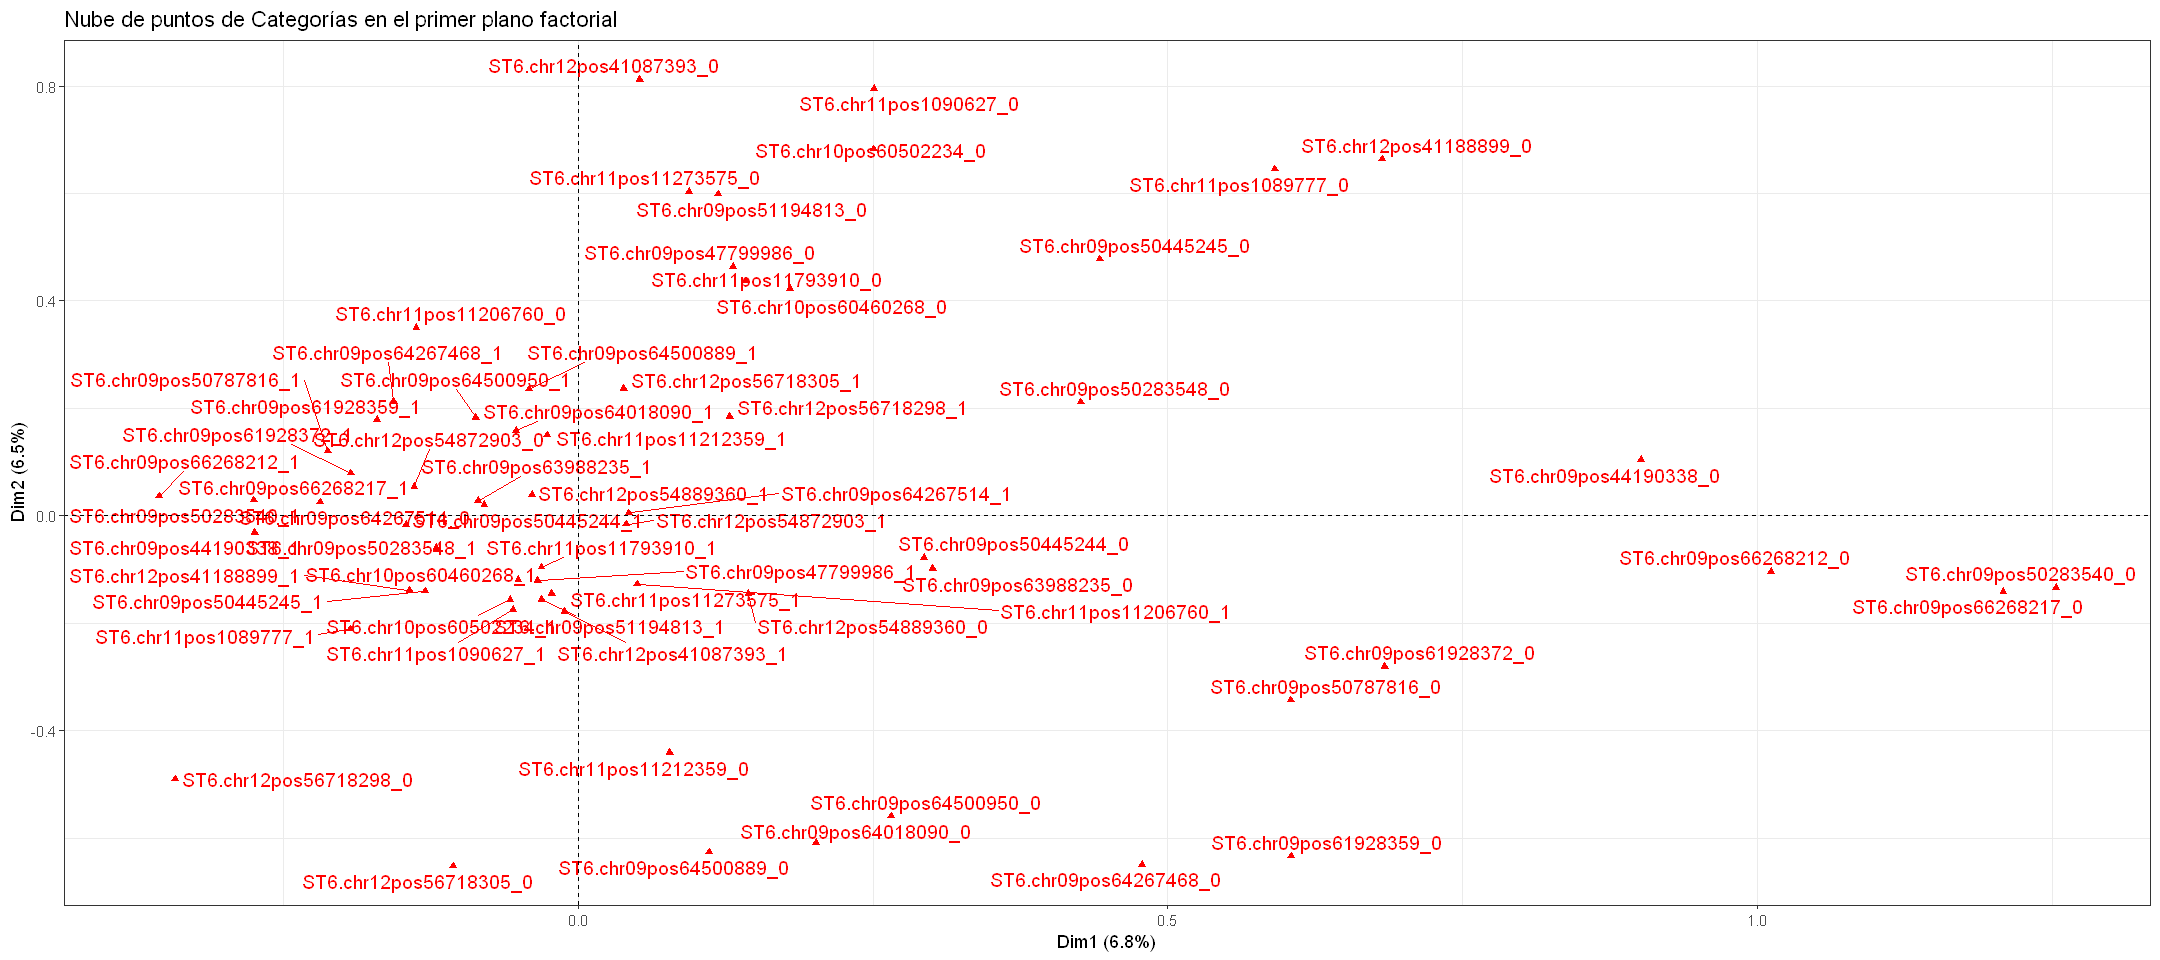

In [30]:
fviz_mca_var(res.mca,axes=c(1,2),repel = T ) +labs(title = "Nube de puntos de Categorías en el primer plano factorial")+theme_bw()


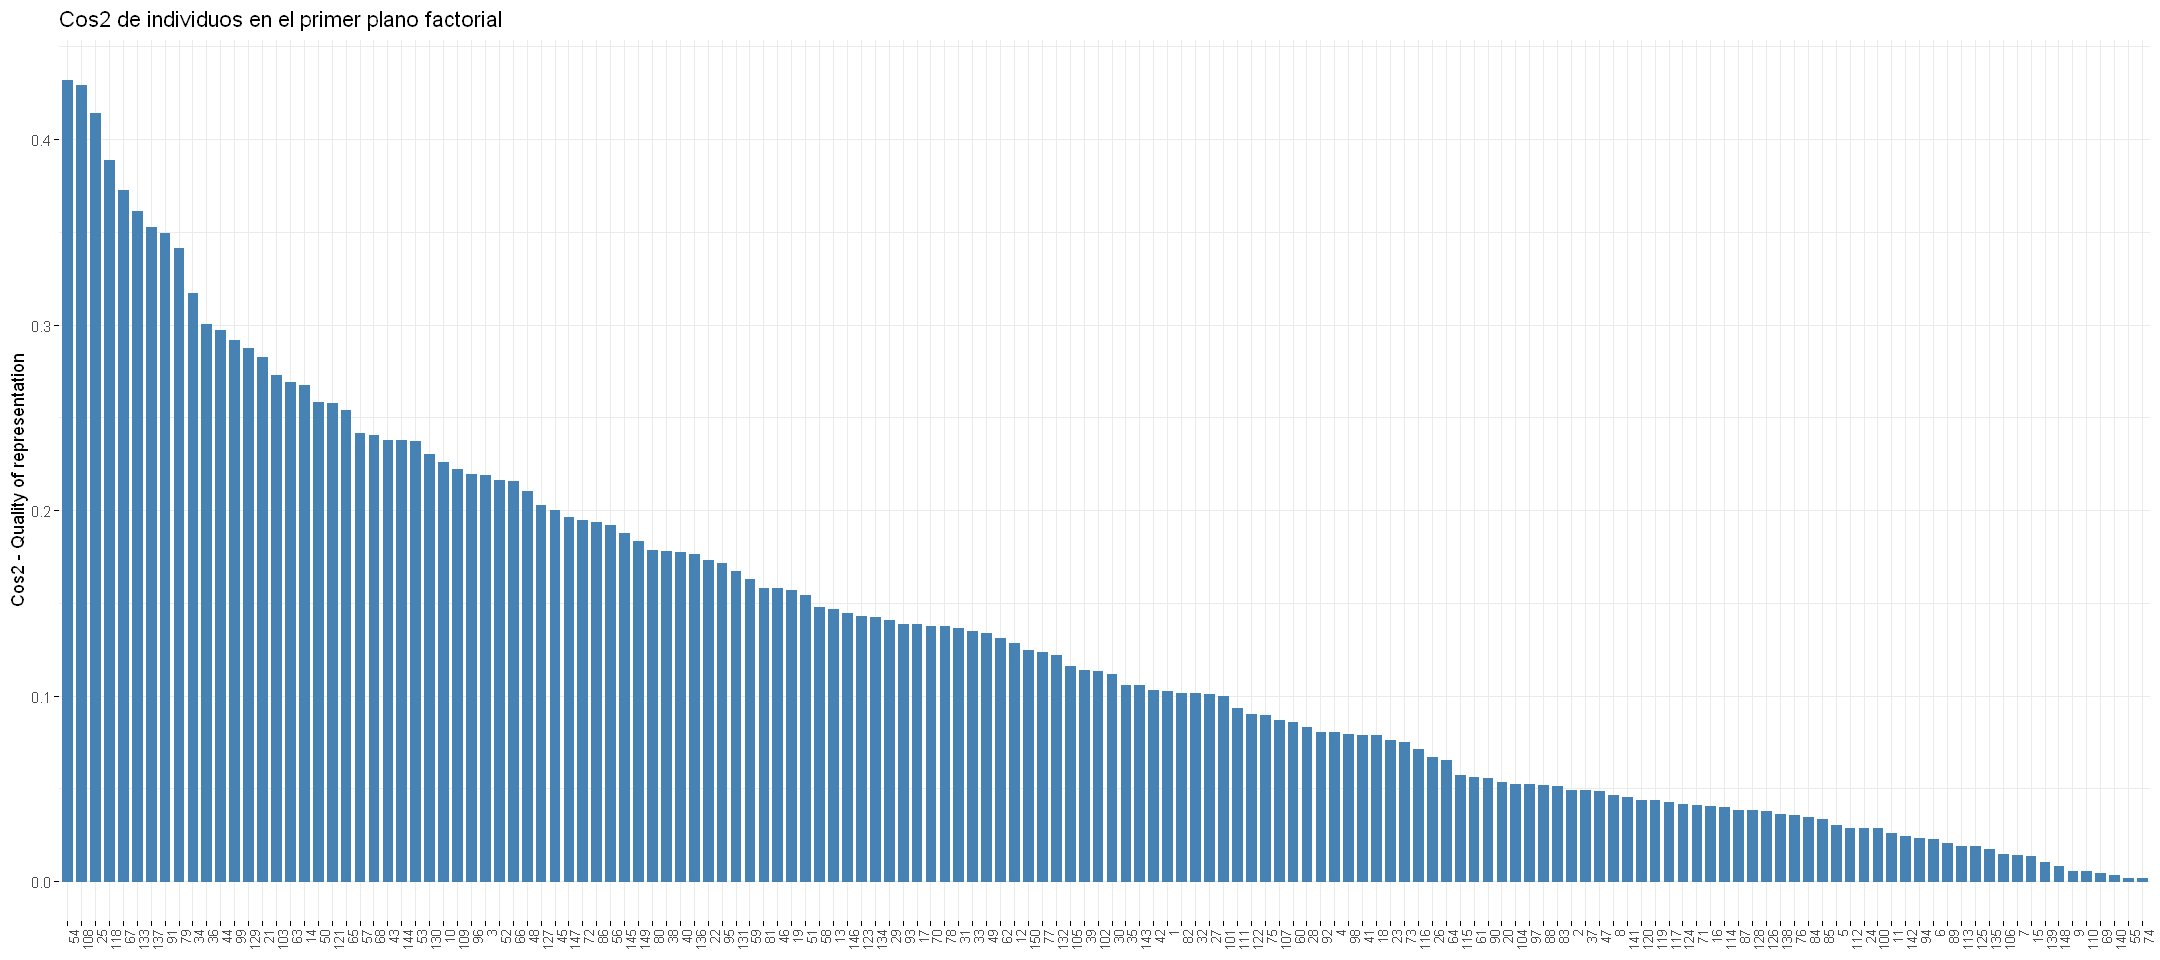

In [31]:
fviz_cos2(res.mca,axes=c(1,2),choice = "ind" )+labs(title = "Cos2 de individuos en el primer plano factorial") + theme(axis.text.x = element_text(size=8, angle = 90))

## <a id='toc1_7_'></a>[Aplicación Metodología](#toc0_)

In [33]:
fenotipo_anto=fenopapa[,c("Taxa","Delphinidin",	"Cyanidin",	"Petunidin",	"Pelargonidin",	"Peonidin")]
X=fenopapa[,c("Taxa","Clado_filogenia")]
X$Clado_filogenia_fact=ifelse(X$Clado_filogenia=="A",2, ifelse(X$Clado_filogenia=="B", 1,ifelse(X$Clado_filogenia=="C",0,NA)))
datos_final_papa2=as.data.frame(datos_final_papa2)
datos_final_papa2$Taxa=nombrespapas
dfDatos <- join_all(list(datos_final_papa2,fenotipo_anto,X), by = 'Taxa', type = 'inner')
Datos_def=na.omit(dfDatos)

In [34]:
X=Datos_def$Clado_filogenia_fact
X=as.matrix(X)
G=Datos_def[,1:1228]
G=as.matrix(G)
Y=Datos_def[,c("Delphinidin",	"Cyanidin",	"Petunidin",	"Pelargonidin",	"Peonidin")]
Y=as.matrix(Y)

### <a id='toc1_7_1_'></a>[Metodología para aplicar](#toc0_)

In [37]:
# Se usa la función implementada en functions.R
Z=metodo(X,G,Y)$Z.score
matcov=metodo(X,G,Y)$m.cov

In [38]:
valprop=eigen(matcov)$values[1]
vecprop=eigen(matcov)$vectors[,1]
i=1
ET=NULL
for (i in 1:ncol(Z)){
  ET[i]=((t(Z[,i])%*%vecprop)^2)/valprop
}
ET_Pval=pchisq(ET, df = 1)

In [39]:
OT=NULL
for (i in 1:ncol(Z)) {
  OT[i]=t(Z[,i])%*%solve(matcov)%*%(Z[,i])
}

OT_Pval=pchisq(OT, df=6)

In [40]:
p=NULL
AT=matrix(ncol = length(ET), nrow=1000)
p=seq(0,1,length.out=1000)
for (i in 1:nrow(AT)) {
   AT[i,]=(1-p[i])*(OT)+p[i]*ET
}
AT_Pval=pchisq(AT, df=5)
AT_Pval_min=NULL
for (i in 1:ncol(AT)) {
   AT_Pval_min[i]=min(AT_Pval[,i])
}


In [41]:
result=tibble(snp=colnames(G),ET_Pval,OT_Pval, AT_Pval_min)

In [42]:
head(result)

snp,ET_Pval,OT_Pval,AT_Pval_min
<chr>,<dbl>,<dbl>,<dbl>
ST6.chr09pos42428007,0.12968347,2.349369e-04,6.110381e-06
ST6.chr09pos42428010,0.09087466,2.269603e-05,1.025777e-06
ST6.chr09pos43997188,0.09448589,2.525482e-05,1.247075e-06
ST6.chr09pos43997199,0.08527780,8.980601e-06,7.459283e-07
ST6.chr09pos43997246,0.08926713,9.939965e-06,9.379989e-07
ST6.chr09pos44190338,0.10077585,2.582584e-05,1.722829e-06


In [43]:
position=str_sub(result$snp,  -8, -1)  
position=as.numeric(position)
chr=str_sub(result$snp,  8, 9) 
chr=as.numeric(chr)
result=tibble(snp=colnames(G), position, chr,ET_Pval,OT_Pval,AT_Pval_min)

Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"


In [44]:
result=na.omit(result)

In [45]:
df <-result[order(result$AT_Pval_min),]
df2 <-result[order(result$OT_Pval),]
df3 <-result[order(result$ET_Pval),]

In [46]:
write.xlsx2(head(df,10), "data/snps_papas_resultado.xlsx")

In [47]:
AT_adjust=data.frame(df[,-c(4,5)],p_AT_adjust=p.adjust(df$AT_Pval_min, method = "BH"))
OT_adjust=data.frame(df2[,-c(4,6)],p_OT_adjust=p.adjust(df2$OT_Pval, method = "BH"))
ET_adjust=data.frame(df3[,-c(5,6)],p_ET_adjust=p.adjust(df3$ET_Pval, method = "BH"))


In [48]:
df_adjust=data.frame(df3[,c(1,2,3)],p_ET_adjust=p.adjust(df3$ET_Pval, method = "BH"),p_OT_adjust=p.adjust(df3$OT_Pval, method = "BH"),p_AT_adjust=p.adjust(df$AT_Pval_min, method = "BH"))
df_adjust_def <-df_adjust[order(df_adjust$p_AT_adjust),]

In [49]:
head(df_adjust_def)

,snp,position,chr,p_ET_adjust,p_OT_adjust,p_AT_adjust
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ST6.chr12pos50683231,50683231,12,0.1386756,1.847755e-06,8.513230e-07
2,ST6.chr11pos29985549,29985549,11,0.1386756,1.847755e-06,8.513230e-07
3,ST6.chr10pos15169924,15169924,10,0.1386756,1.847755e-06,8.513230e-07
4,ST6.chr09pos64796847,64796847,9,0.1386756,1.847755e-06,8.773445e-07
5,ST6.chr12pos25089338,25089338,12,0.1386756,1.847755e-06,8.773445e-07
6,ST6.chr09pos55381283,55381283,9,0.1386756,1.847755e-06,8.773445e-07


In [50]:
write.xlsx2(head(df_adjust_def,10),"data/snps_papas_resultado_ajustado.xlsx")

In [51]:
write.xlsx2(OT_adjust, "data/OT_adjust_snps.xlsx")

In [52]:
AT_pvals=dplyr::filter(AT_adjust,p_AT_adjust<=2.97666503545823e-06)
OT_pvals=dplyr::filter(OT_adjust,p_OT_adjust<=1.06141670094599e-06)
ET_pvals=ET_adjust[1:35,]

In [53]:
AT_pvals=AT_adjust[1:35,]
OT_pvals=OT_adjust[1:35,]
ET_pvals=ET_adjust[1:35,]

In [54]:
lista_snps=list(AT_pvals$snp,OT_pvals$snp, ET_pvals$snp)


In [55]:
quantile(OT_adjust$p_OT_adjust, prob=seq(0, 1, length = 101))

0%           1%           2%           3%           4%           5% 
1.847755e-06 1.847755e-06 1.847755e-06 2.441302e-06 2.976665e-06 3.293409e-06 
          6%           7%           8%           9%          10%          11% 
3.417853e-06 3.417853e-06 3.417853e-06 3.751196e-06 4.234258e-06 4.501082e-06 
         12%          13%          14%          15%          16%          17% 
4.546277e-06 4.632284e-06 4.937326e-06 5.129696e-06 5.448671e-06 5.716007e-06 
         18%          19%          20%          21%          22%          23% 
5.823808e-06 6.061697e-06 6.477555e-06 6.953572e-06 7.196867e-06 7.326741e-06 
         24%          25%          26%          27%          28%          29% 
7.528148e-06 7.715206e-06 8.268170e-06 8.377426e-06 8.857642e-06 9.337456e-06 
         30%          31%          32%          33%          34%          35% 
9.406335e-06 9.588040e-06 9.730814e-06 1.004505e-05 1.029087e-05 1.073127e-05 
         36%          37%          38%          39%          40%          41% 
1.146036e-05 1.175726e-05 1.224919e-05 1.271860e-05 1.332858e-05 1.372501e-05 
         42%          43%          44%          45%          46%          47% 
1.399338e-05 1.430638e-05 1.511930e-05 1.526066e-05 1.555386e-05 1.568636e-05 
         48%          49%          50%          51%          52%          53% 
1.622095e-05 1.668468e-05 1.761580e-05 1.779868e-05 1.815678e-05 1.861585e-05 
         54%          55%          56%          57%          58%          59% 
1.903436e-05 1.943713e-05 2.010611e-05 2.080821e-05 2.223922e-05 2.245747e-05 
         60%          61%          62%          63%          64%          65% 
2.315242e-05 2.386624e-05 2.451582e-05 2.605905e-05 2.708293e-05 2.851317e-05 
         66%          67%          68%          69%          70%          71% 
3.038776e-05 3.232166e-05 3.351612e-05 3.443021e-05 3.543062e-05 3.656371e-05 
         72%          73%          74%          75%          76%          77% 
3.842121e-05 3.981754e-05 4.209682e-05 4.387407e-05 4.555916e-05 4.808335e-05 
         78%          79%          80%          81%          82%          83% 
5.059954e-05 5.193613e-05 5.324998e-05 5.529655e-05 5.818786e-05 6.078322e-05 
         84%          85%          86%          87%          88%          89% 
6.425714e-05 7.119813e-05 7.515380e-05 7.859207e-05 8.266205e-05 9.653604e-05 
         90%          91%          92%          93%          94%          95% 
1.112218e-04 1.261543e-04 1.412805e-04 1.497816e-04 1.853405e-04 2.085988e-04 
         96%          97%          98%          99%         100% 
2.427967e-04 2.868364e-04 4.143968e-04 5.963098e-04 2.118921e-03

In [56]:
quantile(AT_adjust$p_AT_adjust, prob=seq(0, 1, length = 101))

0%           1%           2%           3%           4%           5% 
8.513230e-07 8.773445e-07 1.061417e-06 1.061417e-06 1.061417e-06 1.117605e-06 
          6%           7%           8%           9%          10%          11% 
1.124627e-06 1.124627e-06 1.124627e-06 1.124627e-06 1.124627e-06 1.124627e-06 
         12%          13%          14%          15%          16%          17% 
1.124627e-06 1.141451e-06 1.151177e-06 1.170383e-06 1.170383e-06 1.177172e-06 
         18%          19%          20%          21%          22%          23% 
1.184172e-06 1.192404e-06 1.225132e-06 1.225132e-06 1.267503e-06 1.280829e-06 
         24%          25%          26%          27%          28%          29% 
1.370417e-06 1.370417e-06 1.403823e-06 1.412229e-06 1.465975e-06 1.465975e-06 
         30%          31%          32%          33%          34%          35% 
1.490274e-06 1.491282e-06 1.501023e-06 1.522364e-06 1.522364e-06 1.567517e-06 
         36%          37%          38%          39%          40%          41% 
1.616407e-06 1.653998e-06 1.686875e-06 1.690287e-06 1.707034e-06 1.732125e-06 
         42%          43%          44%          45%          46%          47% 
1.759583e-06 1.785458e-06 1.802172e-06 1.818541e-06 1.863103e-06 1.889705e-06 
         48%          49%          50%          51%          52%          53% 
1.900793e-06 1.917550e-06 1.942564e-06 1.975939e-06 1.977350e-06 2.053908e-06 
         54%          55%          56%          57%          58%          59% 
2.129140e-06 2.175246e-06 2.239855e-06 2.337772e-06 2.394205e-06 2.425860e-06 
         60%          61%          62%          63%          64%          65% 
2.489301e-06 2.494826e-06 2.540712e-06 2.599624e-06 2.625903e-06 2.698194e-06 
         66%          67%          68%          69%          70%          71% 
2.813254e-06 2.895366e-06 2.956389e-06 3.034139e-06 3.067145e-06 3.069031e-06 
         72%          73%          74%          75%          76%          77% 
3.110924e-06 3.149009e-06 3.180652e-06 3.232059e-06 3.326385e-06 3.438003e-06 
         78%          79%          80%          81%          82%          83% 
3.463842e-06 3.551318e-06 3.811993e-06 3.914285e-06 4.017106e-06 4.128518e-06 
         84%          85%          86%          87%          88%          89% 
4.320829e-06 4.535248e-06 4.774911e-06 5.037452e-06 5.264132e-06 5.659401e-06 
         90%          91%          92%          93%          94%          95% 
6.075872e-06 6.299806e-06 6.705191e-06 7.225317e-06 8.019377e-06 8.622143e-06 
         96%          97%          98%          99%         100% 
1.008398e-05 1.111476e-05 1.473535e-05 1.914204e-05 5.043659e-05

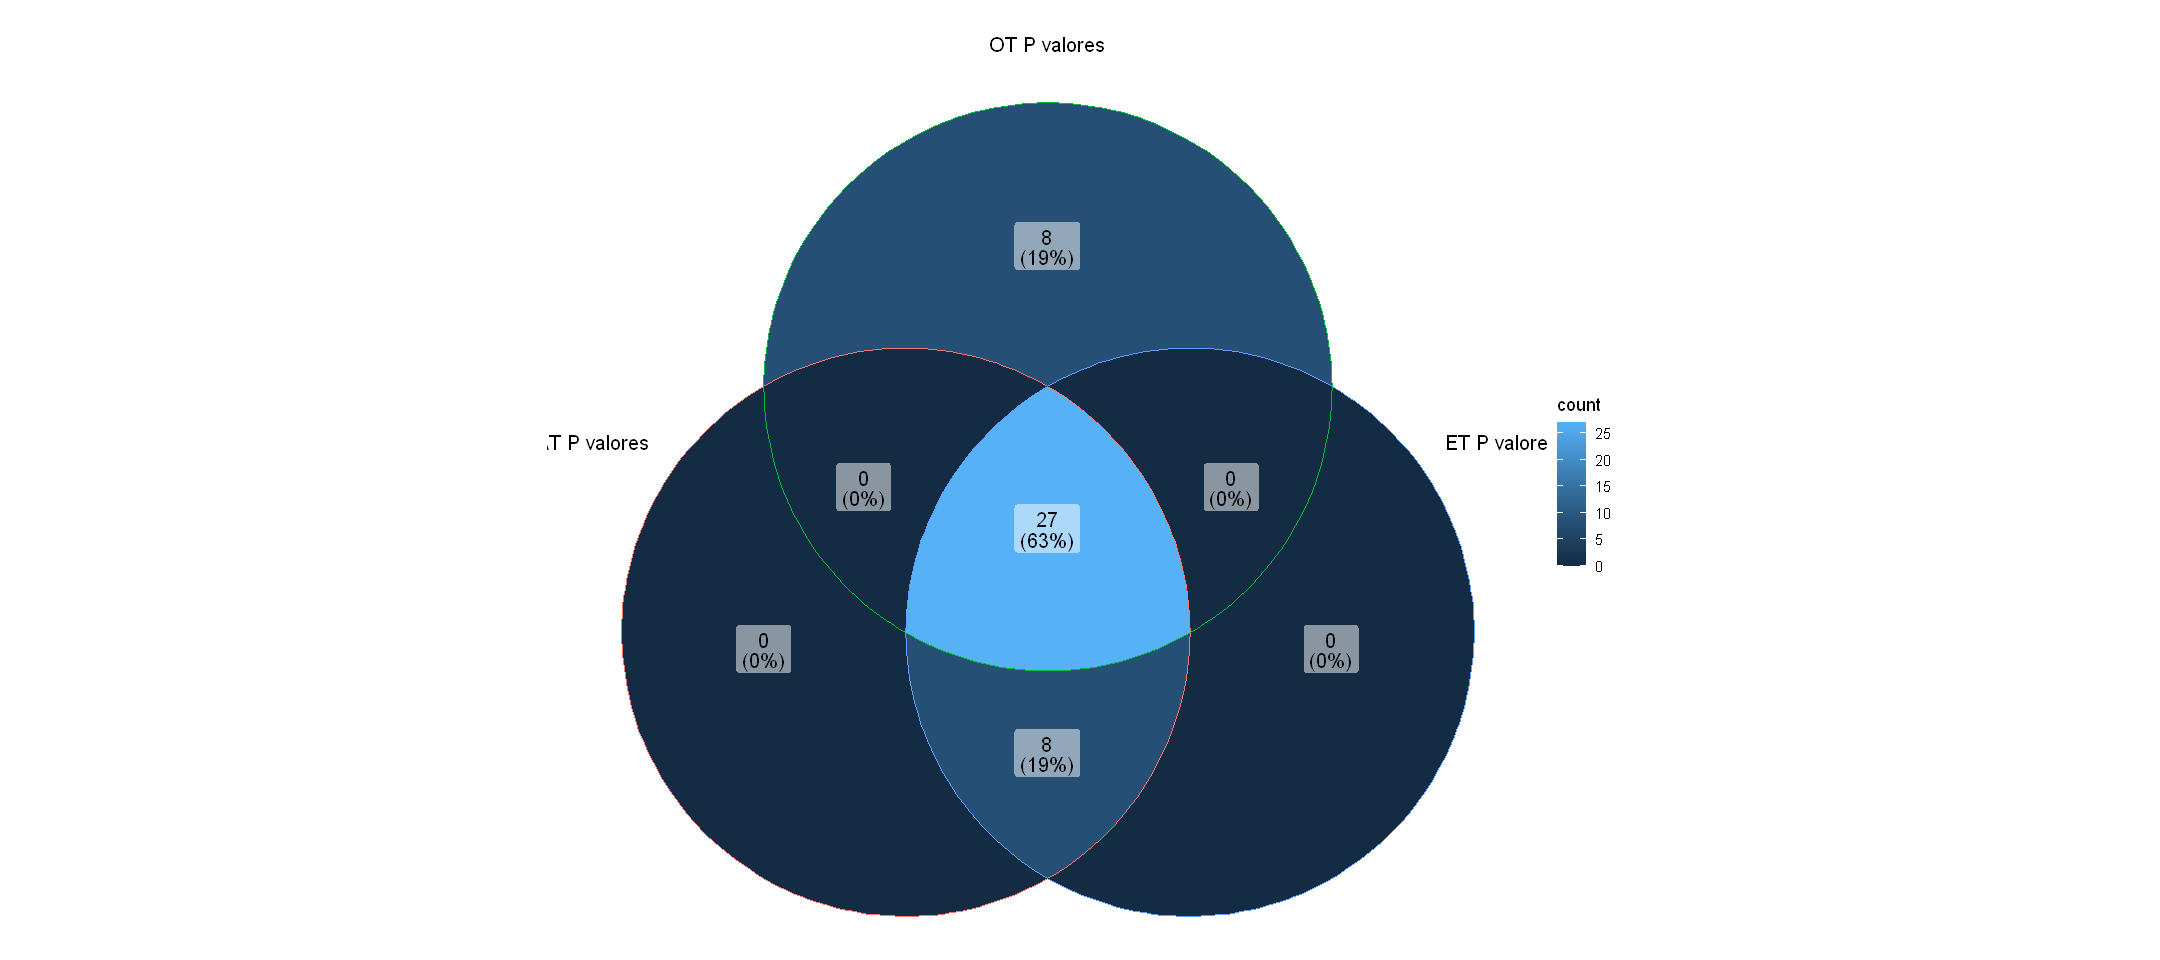

In [64]:
ggVennDiagram(lista_snps,category.names = c("AT P valores","OT P valores", "ET P valores"))

In [65]:
head(df[, -c(4,5)],20)

snp,position,chr,AT_Pval_min
<chr>,<dbl>,<dbl>,<dbl>
ST6.chr12pos50683231,50683231,12,1.817550e-09
ST6.chr11pos29985549,29985549,11,2.012103e-09
ST6.chr10pos15169924,15169924,10,2.847234e-09
ST6.chr09pos64796847,64796847,9,4.115034e-09
ST6.chr12pos25089338,25089338,12,6.000752e-09
ST6.chr09pos55381283,55381283,9,6.566223e-09
ST6.chr11pos44324168,44324168,11,7.158597e-09
ST6.chr10pos54499752,54499752,10,8.291301e-09
ST6.chr12pos15404068,15404068,12,9.514655e-09


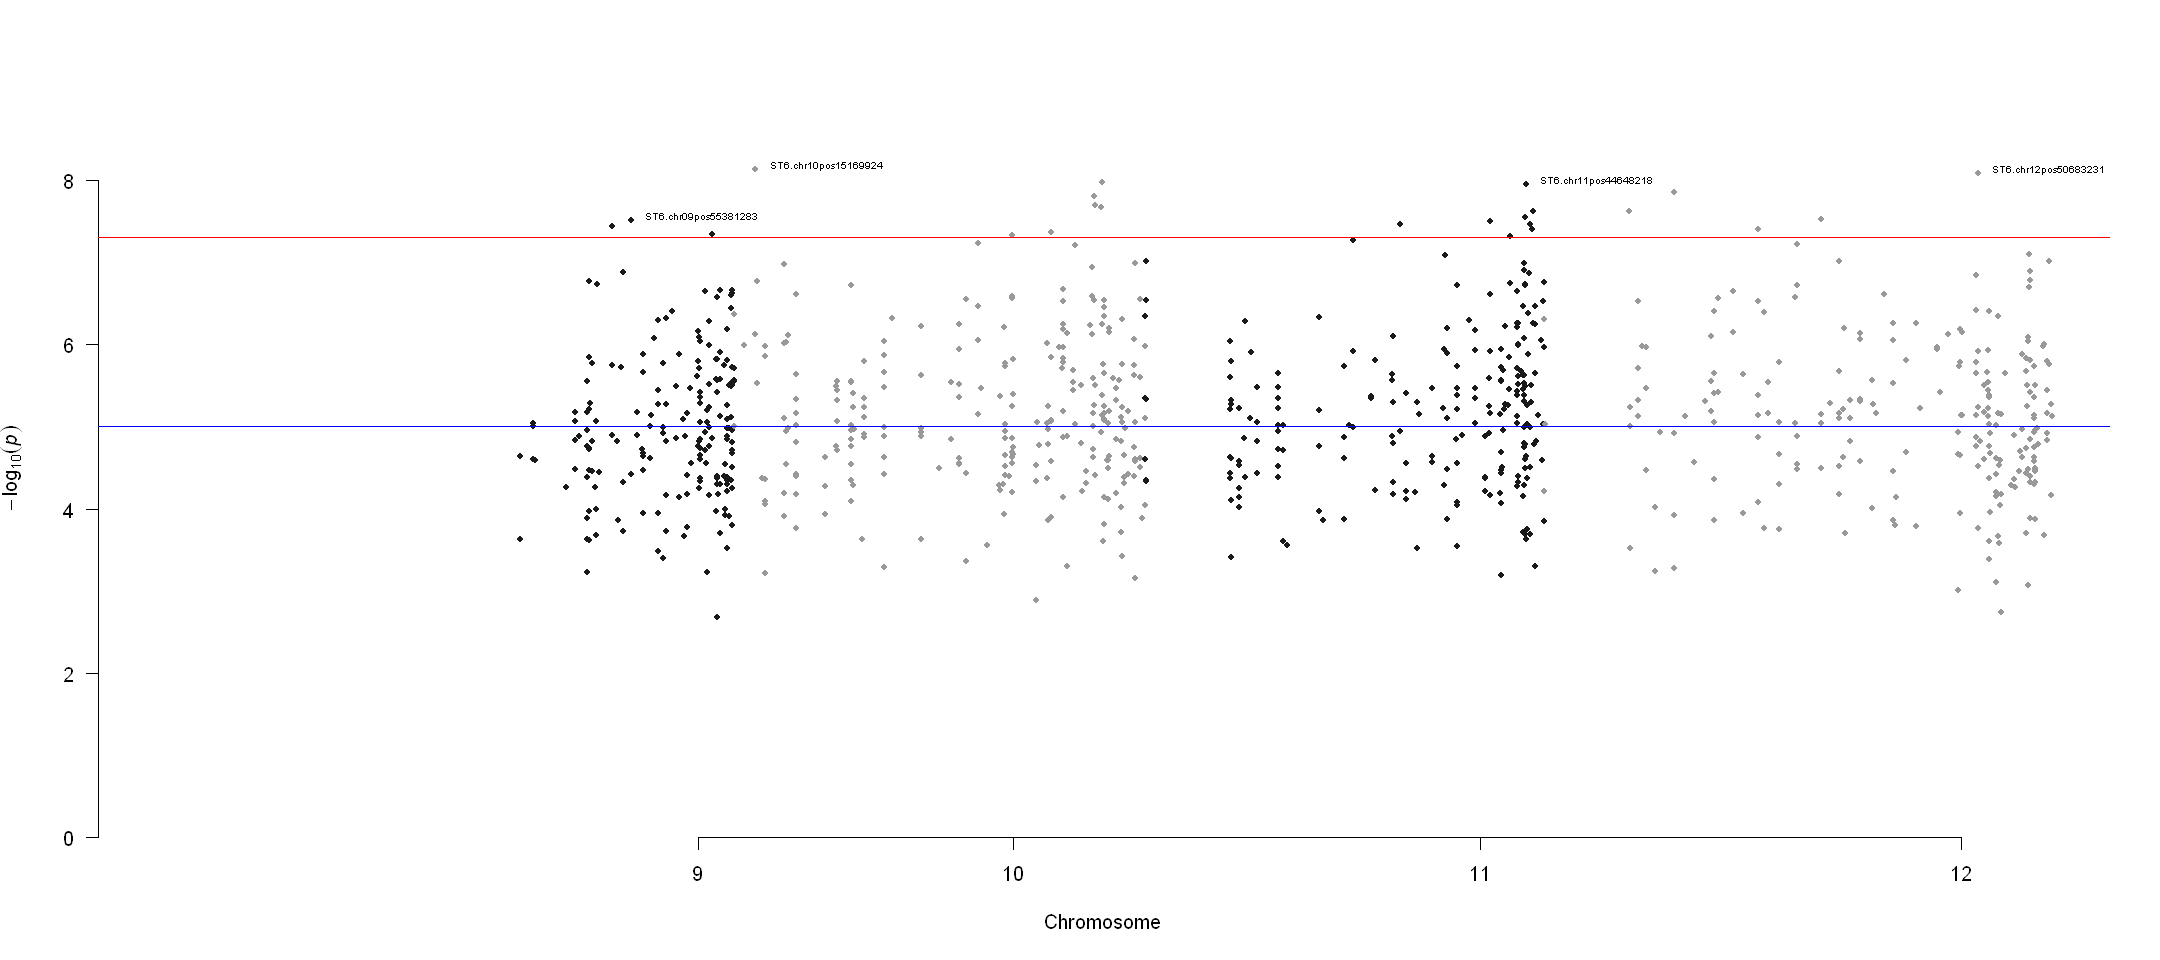

In [66]:
###OT Manhattan
manhattan(result, chr="chr",snp = "snp", bp="position", p="OT_Pval", annotatePval = 0.01)

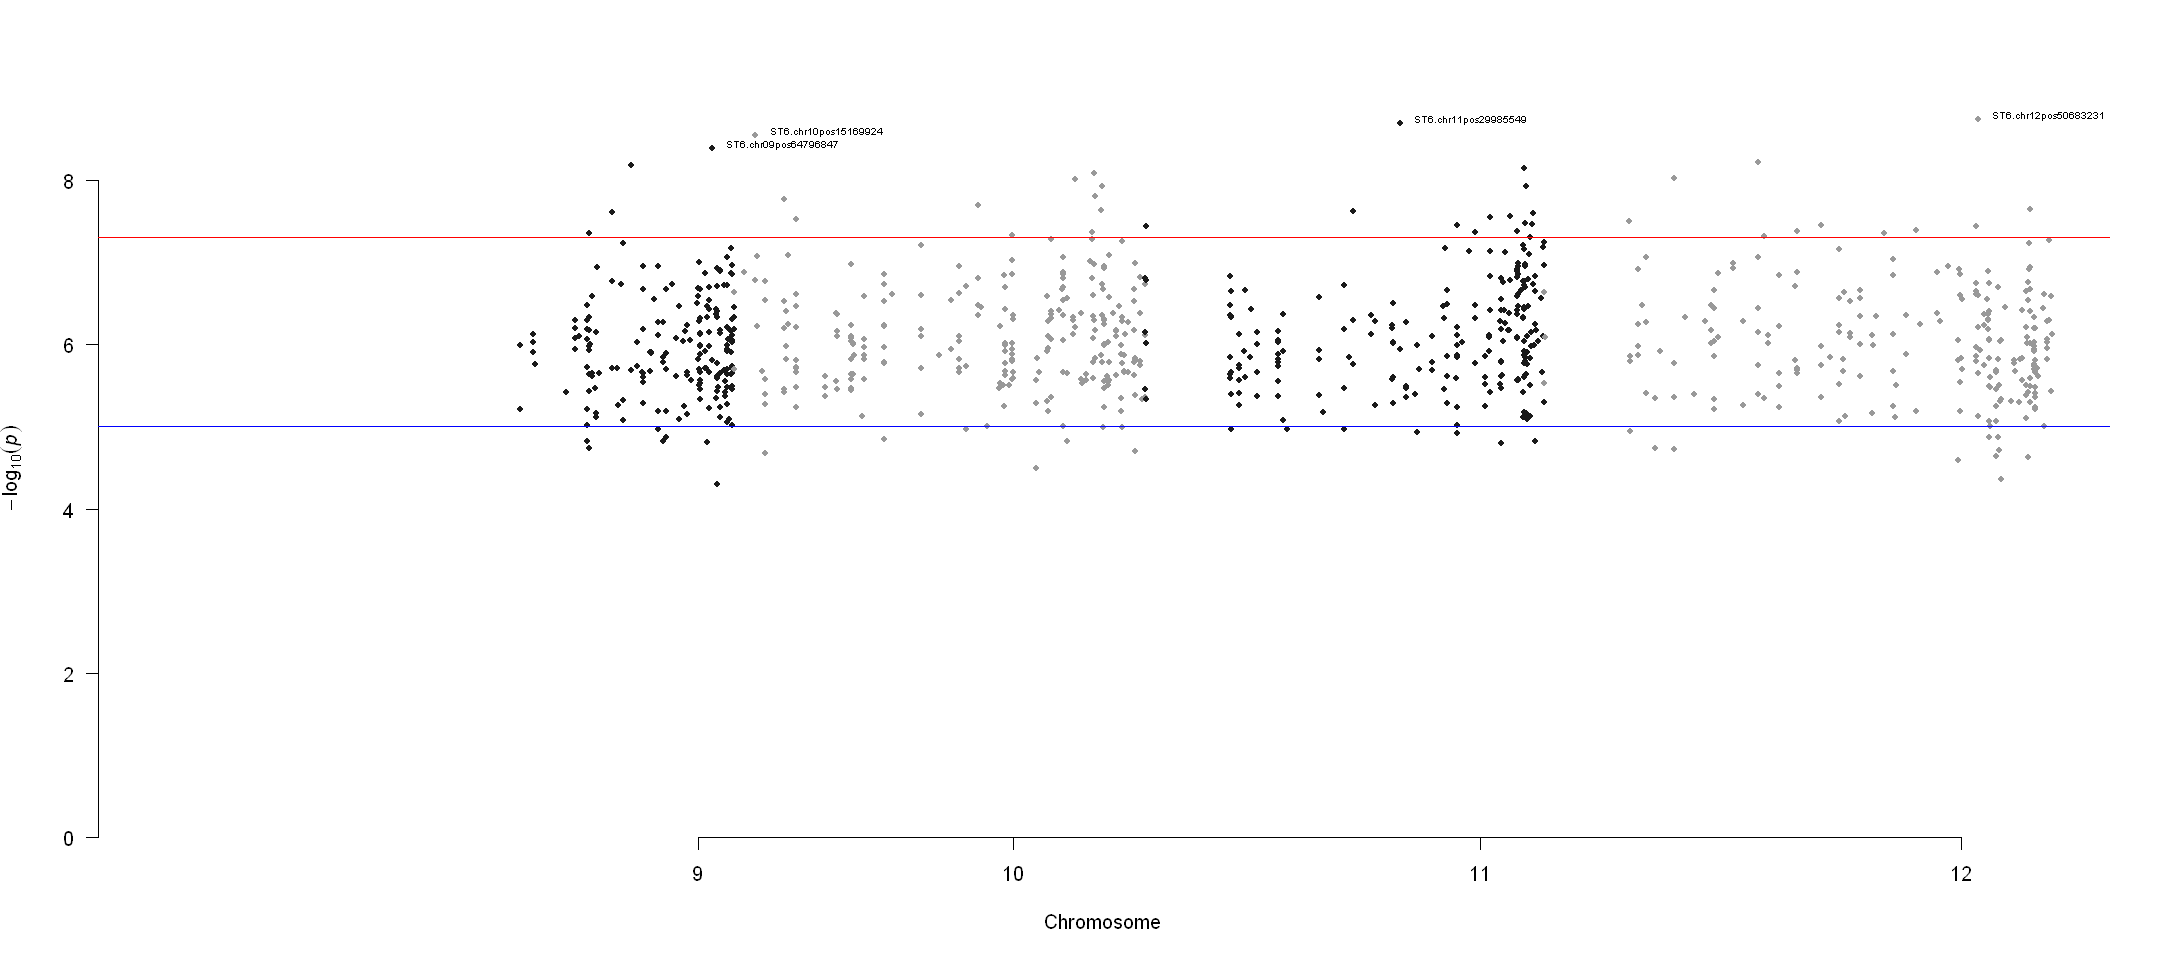

In [67]:
###AT Manhattan
manhattan(result, chr="chr",snp = "snp", bp="position", p="AT_Pval_min", annotatePval = 0.01)

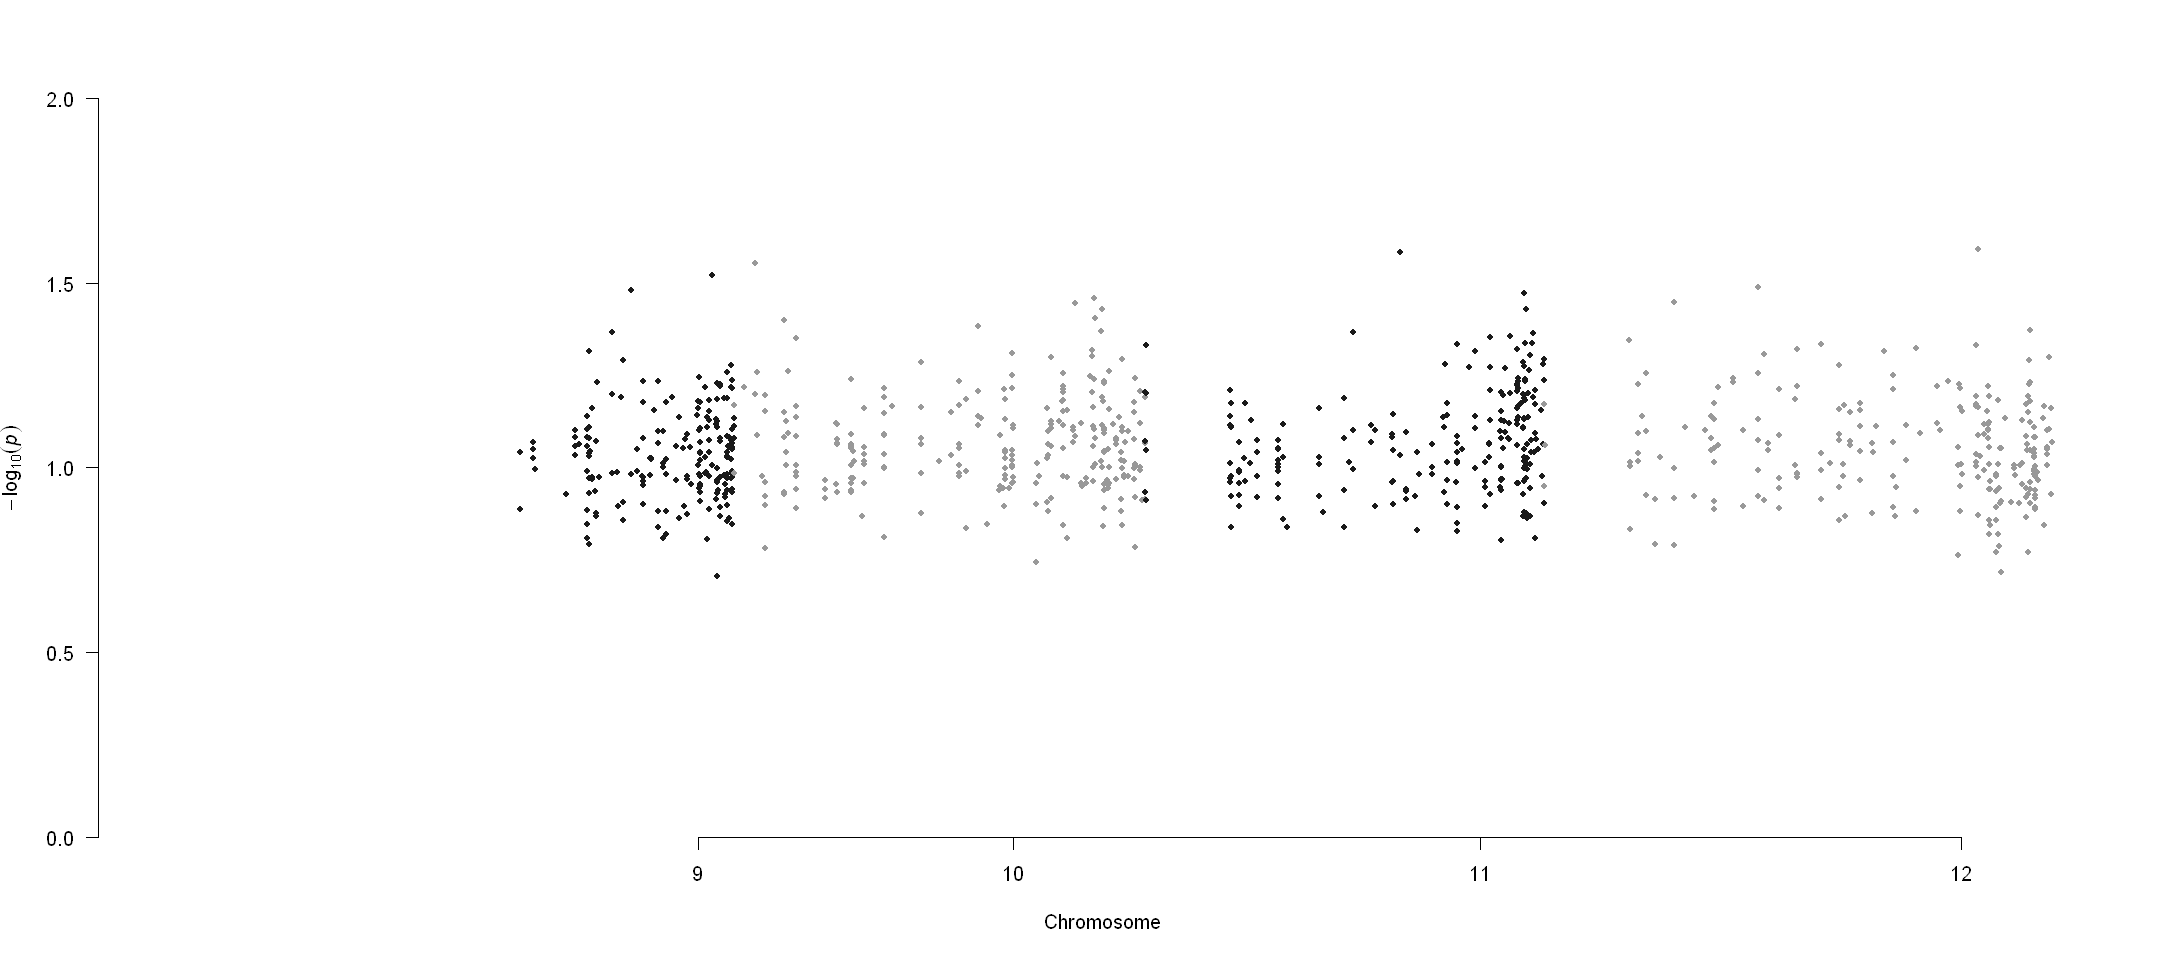

In [68]:
###ET Manhattan
manhattan(result, chr="chr",snp = "snp", bp="position", p="ET_Pval")

In [69]:
head(result)

snp,position,chr,ET_Pval,OT_Pval,AT_Pval_min
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ST6.chr09pos42428007,42428007,9,0.12968347,2.349369e-04,6.110381e-06
ST6.chr09pos42428010,42428010,9,0.09087466,2.269603e-05,1.025777e-06
ST6.chr09pos43997188,43997188,9,0.09448589,2.525482e-05,1.247075e-06
ST6.chr09pos43997199,43997199,9,0.08527780,8.980601e-06,7.459283e-07
ST6.chr09pos43997246,43997246,9,0.08926713,9.939965e-06,9.379989e-07
ST6.chr09pos44190338,44190338,9,0.10077585,2.582584e-05,1.722829e-06
